In [1]:
from stereo3d import stereo3d_read_from_zips as std_read
from parsivel import pars_read_from_zips as pars_read
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np 
stereo_datafolder = "/home/marcio/stage_project/data/Daily_raw_data_3D_stereo"
pars_datafolder = "/home/marcio/stage_project/data/Pars_1"
beg = 20230728000000
end = 20230731000000

# Read all the data and extract one event

In [2]:
# Read the main parsivel series
parsivel_series = pars_read(beg, end, pars_datafolder)

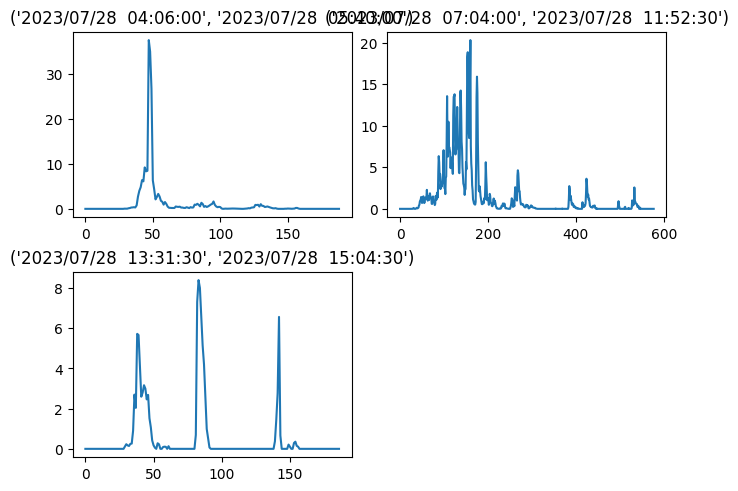

In [3]:
parsivel_events = parsivel_series.exstract_events(60, 15, 0.0001)
n = int(np.ceil(len(parsivel_events)**0.5))
figure = plt.figure()
figure.set_constrained_layout(True)
for i, event in enumerate(parsivel_events):
    ax = figure.add_subplot(n,n, i + 1)
    ax.plot(event.rain_rate)
    ax.set_title(event.duration_readable)

In [4]:
pars_event = parsivel_events[1]

#### Select event from Stereo 3D

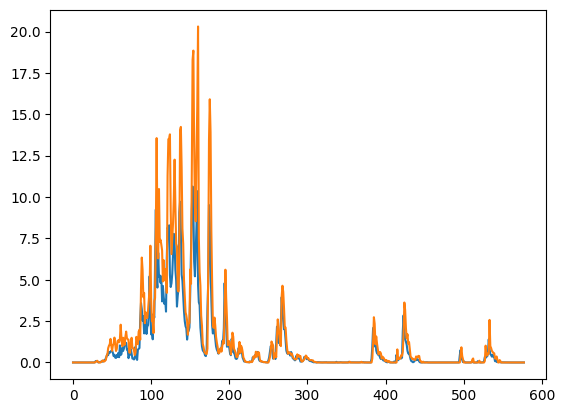

In [5]:
stereo_event = std_read(beg, end, stereo_datafolder).extract_events([pars_event.duration])[0]
figure, ax = plt.subplots()
ax.plot(stereo_event.rain_rate())
ax.plot(pars_event.rain_rate)

### Save the event for stereo 3D and parsivel

In [ ]:
pars_file = "/home/marcio/stage_project/data/saved_events/pasivel01.obj"
stereo3d = "/home/marcio/stage_project/data/saved_events/stereo3d01.obj"
stereo_event.to_pickle(stereo3d)
pars_event.to_pickle(pars_file)